In [6]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import scipy as sc

The SIR model is defined by the following set of coupled ordinary differential equations

\begin{align}
    \frac{dS}{dt}&=\Lambda-\mu S-\beta \frac{IS}{N}\\
    \frac{dI}{dt}&=\beta \frac{IS}{N}-(\gamma+\mu)I\\
    \frac{dR}{dt}&=\gamma I-\mu R
\end{align}

Where $S:Susceptibles$, $I:Infecteds$ y $R:Recovered$, $\Lambda^{-1}=\mu^{-1}:Period\;of\;birth\;and\;death$, $\beta^{-1}:Time\;between\;infections$ and $\gamma:typical\;time\;of\;recovered$.

In [7]:
"""Methods for SIR model computational solution"""

def susceptible(Lambda,Mu,Beta,Gamma,s,i,t):
    """
    Differential equation of Susceptible.
    """
    return Lambda-Mu*s-Beta*s*i

def infected(Lambda,Mu,Beta,Gamma,s,i,t):
    """
    Differential equation of Infected.
    """
    return Beta*s*i-(Mu+Gamma)*i

def RungeKutta4(susceptible,infected,t0,s0,i0,tF,Lambda,Mu,Beta,Gamma,dt):
    """
    RungeKutta method is used to solve the coupled equations of the SIR model.
    """
    n=int((tF-t0)/dt)+1 #h=(tf-t0)/(n-1)
    t=np.linspace(t0,tF,n)
    s=np.zeros([n])
    i=np.zeros([n])
    r=np.zeros([n])

    s[0]=s0
    i[0]=i0
    r[0]=1-(s0+i0)

    for j in range(1,n,1):
        ds_1 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1],
            i[j-1],
            t[j-1]
        )
        di_1 = dt*infected(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1],
            i[j-1],
            t[j-1]
        )

        ds_2 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_1/2.0,
            i[j-1]+di_1/2.0,
            t[j-1]+dt/2.0
        )
        di_2 = dt*infected(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_1/2.0,
            i[j-1]+di_1/2.0,
            t[j-1]+dt/2.0
        )

        ds_3 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_2/2.0,
            i[j-1]+di_2/2.0,
            t[j-1]+dt/2.0
        )
        di_3 = dt*infected(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_2/2.0,
            i[j-1]+di_2/2.0,
            t[j-1]+dt/2.0
        )

        ds_4 = dt*susceptible(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_3,
            i[j-1]+di_3,
            t[j-1]+dt,
        )
        di_4 = dt*infected(
            Lambda,
            Mu,
            Beta,
            Gamma,
            s[j-1]+ds_3,
            i[j-1]+di_3,
            t[j-1]+dt
        )

        s[j]=s[j-1]+(ds_1+2.0*ds_2+2.0*ds_3+ds_4)/6.0
        i[j]=i[j-1]+(di_1+2.0*di_2+2.0*di_3+di_4)/6.0
        r[j]=1-(s[j]+i[j])

    return t,s,i,r

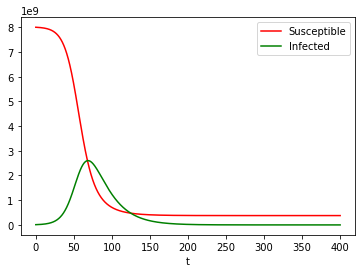

In [79]:
"""Model parameters"""

Lambda = 0
Mu=0
Beta=0.00000000002
Gamma=0.05

#Initial conditions.
s_0=8*10**9
i_0=10000000
dt=0.1

#Days
t_0=0
t_F=400

T=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[0]
S=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[1]
I=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[2]
R=RungeKutta4(susceptible,infected,t_0,s_0,i_0,t_F,Lambda,Mu,Beta,Gamma,dt)[3]

plt.figure()
plt.plot(T,S,label="Susceptible",color="red")
plt.plot(T,I,label="Infected",color="green")
# plt.plot(T,R,label="Recovered",color="black")
plt.legend()
plt.xlabel("t")
plt.show()